# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [210]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-30 02:01:40--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-30 02:01:41--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.6’

clientes_segmento

In [211]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [212]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23


In [213]:
numero_clientes = df['id_cliente'].nunique()
numero_clientes

15000

In [214]:
distribucion_plataforma = df.groupby('plataforma')['id_cliente'].nunique().reset_index()
distribucion_plataforma.columns = ['Plataforma', 'Número de Clientes']
distribucion_plataforma

,Plataforma,Número de Clientes
0,Facebook,5288
1,Instagram,5972
2,TikTok,3740


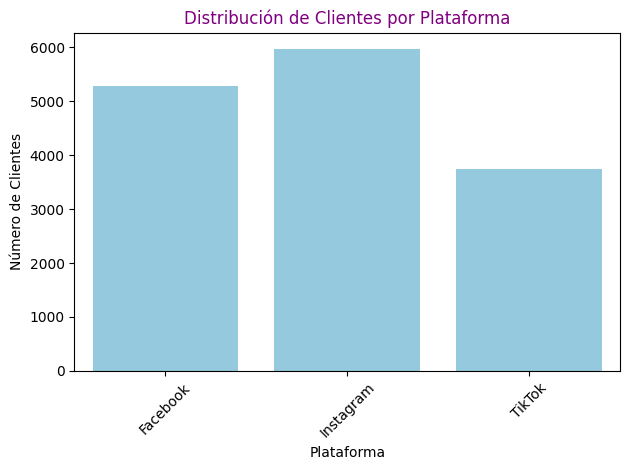

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=distribucion_plataforma, x='Plataforma', y='Número de Clientes', color='skyblue')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Plataforma', color='purple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


In [216]:
df['edad'].describe()

,edad
count,15000.000000
mean,33.101800
std,11.393441
min,16.000000
25%,24.000000
50%,31.000000
75%,40.000000
max,60.000000


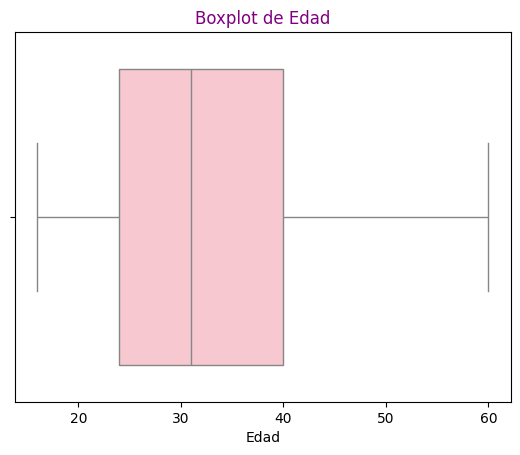

In [217]:
sns.boxplot(x=df['edad'],color='pink') # Gráfico para visualizar los outliers
plt.title('Boxplot de Edad', color='purple')
plt.xlabel('Edad')
plt.show()

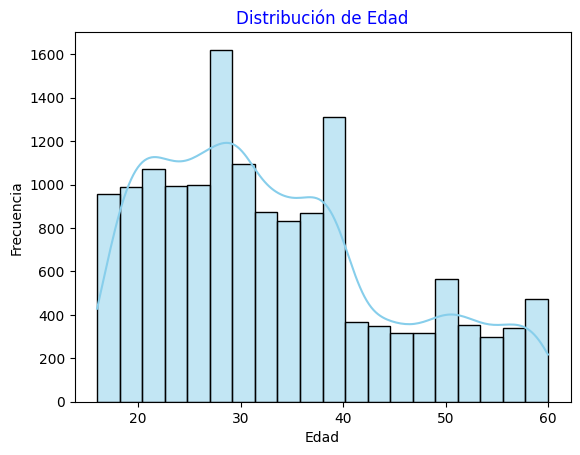

In [218]:
sns.histplot(df['edad'], bins=20, kde=True, color='skyblue') #Visualización de la distribución de la edad
plt.title('Distribución de Edad', color='blue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### P3. ¿Existe correlación entre ingresos y total_gastado?


In [219]:
correlacion = df['ingresos'].corr(df['total_gastado'])
print(f"Correlación entre income y total_gastado: {correlacion:.2f}")

Correlación entre income y total_gastado: 0.26


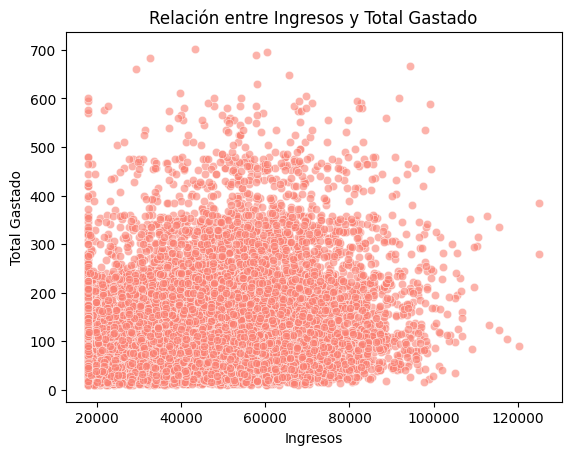

In [220]:
sns.scatterplot(data=df, x='ingresos', y='total_gastado', alpha=0.6, color='salmon') #correlación entre ingresos y total gastado
plt.title('Relación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [221]:
from datetime import datetime

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)

### P4. CAC vs LTV por plataforma

In [222]:
cac_por_plataforma = df.groupby('plataforma')['costo_adquisicion'].mean() #CAC por plataforma
cac_por_plataforma.columns = ['plataforma', 'CAC']
cac_por_plataforma

,costo_adquisicion
plataforma,
Facebook,25.039334
Instagram,17.488948
TikTok,12.598128


In [223]:
ltv_por_plataforma = df.groupby('plataforma')['total_gastado'].mean().reset_index() #LTV por plataforma
ltv_por_plataforma.columns = ['plataforma', 'LTV']
ltv_por_plataforma

,plataforma,LTV
0,Facebook,186.871407
1,Instagram,87.800904
2,TikTok,57.341979


In [224]:
df['ltv'] = df['total_gastado']  # Si LTV es total_gastado por cliente

CAC_LTV = df.groupby('plataforma')[['costo_adquisicion', 'ltv']].mean()
CAC_LTV

,costo_adquisicion,ltv
plataforma,,
Facebook,25.039334,186.871407
Instagram,17.488948,87.800904
TikTok,12.598128,57.341979


In [225]:
cac_por_plataforma = df.groupby('plataforma')['costo_adquisicion'].mean()
ltv_por_plataforma = df.groupby('plataforma')['total_gastado'].mean()

cac_ltv = pd.DataFrame({'CAC': cac_por_plataforma, 'LTV': ltv_por_plataforma})
cac_ltv


,CAC,LTV
plataforma,,
Facebook,25.039334,186.871407
Instagram,17.488948,87.800904
TikTok,12.598128,57.341979


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [226]:
features = ['ingresos', 'total_gastado', 'frecuencia_mensual', 'dias_desde_ultima']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [227]:
features = ['edad', 'total_gastado', 'ingresos', 'interacciones']
X_scaled = scaler.fit_transform(df[features])
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

### P5. Visualiza clusters

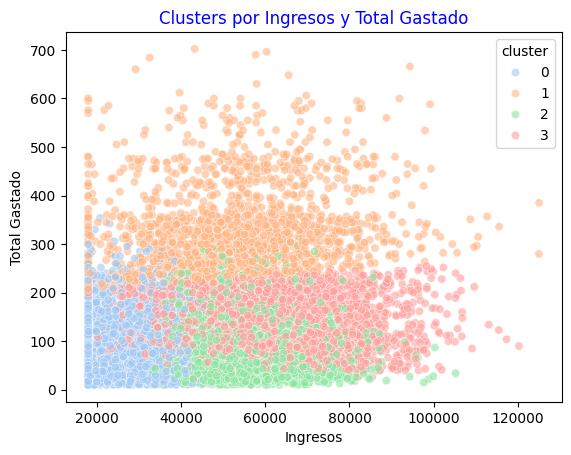

In [228]:
sns.scatterplot(data=df, x='ingresos', y='total_gastado', hue='cluster', alpha=0.6, palette='pastel')  # Clusters por ingresos y total gastado
plt.title('Clusters por Ingresos y Total Gastado', color='blue')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()

#### CREA LA COLUMNA ganancia resultante entre el ltv- CAC

In [229]:
df['ganancia'] = df['ltv'] - df['costo_adquisicion']
cluster_summary = df.groupby('cluster')[['edad', 'ingresos', 'ltv', 'costo_adquisicion', 'ganancia']].mean()
cluster_summary

,edad,ingresos,ltv,costo_adquisicion,ganancia
cluster,,,,,
0,24.486227,26760.842367,73.690421,15.393282,58.297139
1,44.054707,53200.099237,332.006361,24.788804,307.217557
2,29.585330,52423.006357,77.314670,16.301956,61.012714
3,45.401509,57605.978981,127.780922,24.712476,103.068445


### P6. Ganancia promedio por cluster

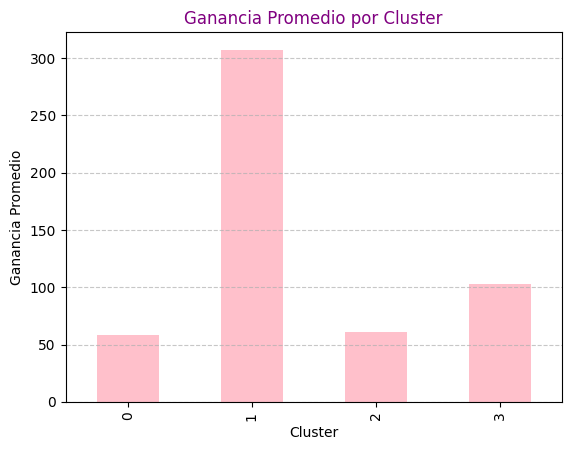

In [230]:
cluster_summary['ganancia'].plot(kind='bar', color='pink')
plt.title('Ganancia Promedio por Cluster', color='purple')
plt.xlabel('Cluster')
plt.ylabel('Ganancia Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### P7. Género por cluster


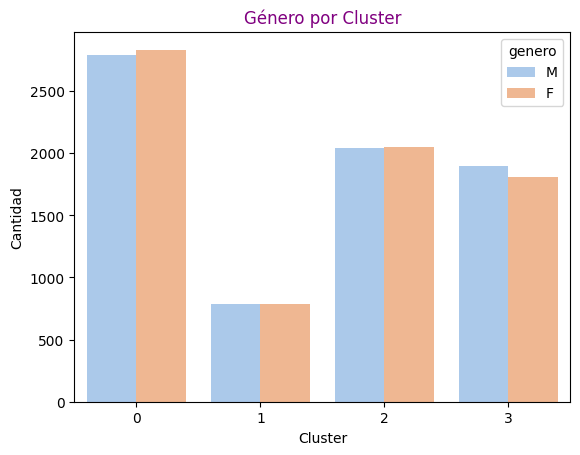

In [231]:
sns.countplot(data=df, x='cluster', hue='genero', palette='pastel')
plt.title('Género por Cluster', color='purple')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()

### P8. Plataforma por cluster


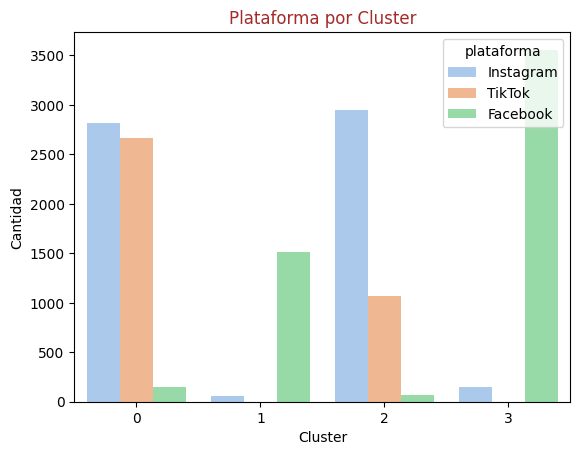

In [232]:
sns.countplot(data=df, x='cluster', hue='plataforma', palette='pastel')
plt.title('Plataforma por Cluster', color='brown')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()

### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


Cluster 0: Clientes potenciales

Perfil: Usuarios equilibrados en género, activos en Instagram y TikTok, con ganancia moderada. Compran con cierta frecuencia pero gastan poco. Tienen potencial de crecimiento si se estimula su conversión o ticket promedio. Representan un grupo balanceado, ideal para promociones amplias. Asimismo, tiene una combinación fuerte entre Instagram y TikTok, ambos géneros casi por igual.


Cluster 1: Clientes leales de alto valor

Perfil: Mayor ganancia promedio de todos los clusters. Usan principalmente Facebook. Comportamiento equilibrado en género, aunque en menor volumen a comparacion de los demas; son compradores frecuentes y de alto valor. Este grupo es clave para la rentabilidad del negocio, pues son clave para mantener con contenido exclusivo y fidelización.

Cluster 2: Clientes ocasionales

Perfil: Prefieren Instagram, con compras menos frecuentes y bajo gasto total. Tienen una presencia moderada, pero representan una menor rentabilidad. Ideal para campañas de reorientación o promociones. Segmento muy visual, probablemente joven que responde mejor a campañas de marca o engagement que a ventas directas.

Cluster 3: Clientes estables de bajo valor

Perfil: Usuarios dominantes en Facebook, con una ligera mayoría masculina. Generan una ganancia promedio intermedia. No son los que más compran ni gastan, pero mantienen cierto nivel de actividad. Requieren incentivos o valor agregado para subir su nivel. Es decir, es un segmento fiel, pero menos impulsivo; las campañas de confianza y reputación funcionan mejor.

### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

P10. Yo eligiría y asignaría así:

Cluster 1: Clientes leales de alto valor (alto LTV, alta ganancia). Daria el presupuesto de 4,000 USD, pues este grupo ya representa una parte significativa de la rentabilidad del negocio. Sería para invertir en retenerlos y premiarlos con incentivos exclusivos, fortaleciendo su lealtad y aumentando las compras repetidas. Para eso se harian estrategia de fidelización con contenido exclusivo, promociones personalizadas, programas VIP, etc.

Cluster 0: Clientes potenciales (potencial de crecimiento). Daría el presupuesto de 6,000 USD, ya que este grupo tiene un gran potencial de crecimiento y si se les ofrece el estímulo adecuado sería ganancia; la estrategia sería con campañas de conversión o aumento del ticket promedio, promociones dirigidas, pruebas A/B, entre otras.

P11. El cluster que podría fidelizar con bajo costo es el Cluster 3: Clientes estables de bajo valor. Aunque su nivel de compra no es alto, este grupo tiene un comportamiento estable y puede ser incentivado con ofertas o promociones que no requieran una gran inversión. Por ejemplo, programas de recompensas o descuentos pequeños pueden ser efectivos para aumentar su nivel de compra con poco gasto.

P12. Para mí 2 riesgos o limitaciones del análisis son:
1. Falta de dinamismo en los Clusters, pues los comportamientos de los clientes pueden cambiar con el tiempo, y un análisis estático puede no reflejar adecuadamente estos cambios. Los clientes podrían moverse de un cluster a otro debido a factores como cambios en sus intereses, comportamientos de compra o respuesta a campañas de marketing o comunicacion.

2. No considerar la influencia de factores externos, ya que factores como cambios económicos, políticas o incluso nuevas tendencias en redes sociales pueden llegar a afectar los patrones de compra y si el análisis no toma en cuenta estos elementos, las decisiones basadas en este podrían no ser del todo efectivas y claras.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología

**Resumen Ejecutivo**

*Análisis de Segmentación de Clientes YumFit*

Cluster 0: Clientes potenciales son usuarios activos en Instagram y TikTok, con un comportamiento equilibrado en cuanto a género. Tienen una ganancia moderada y compran con cierta frecuencia, pero su gasto es bajo. Este grupo tiene un potencial de crecimiento significativo si se implementan estrategias de conversión o aumento del ticket promedio.

Cluster 1: Clientes leales de alto valor son compradores frecuentes y de alto valor, predominantemente en Facebook. Este grupo tiene la mayor ganancia promedio del conjunto y es clave para la rentabilidad del negocio. Son ideales para fidelización con contenido exclusivo y programas de lealtad.

Cluster 2: Clientes ocasionales son aquellos que prefieren Instagram, con compras poco frecuentes y bajo gasto. Aunque su rentabilidad es baja, son un grupo ideal para campañas de  reorientación o promociones. Segmento muy visual, probablemente joven que responde mejor a campañas de marca o engagement que a ventas directas.

Cluster 3: Clientes estables de bajo valor son usuarios dominantes en Facebook, con una ligera mayoría masculina. Generan una ganancia promedio intermedia. No son los que más compran ni gastan, pero mantienen cierto nivel de actividad. Requieren incentivos o valor agregado para subir su nivel. Es decir, es un segmento fiel, pero menos impulsivo; las campañas de confianza y reputación funcionan mejor.

*Tabla Resumen (LTV, CAC, Ganancia, Tamaño):*

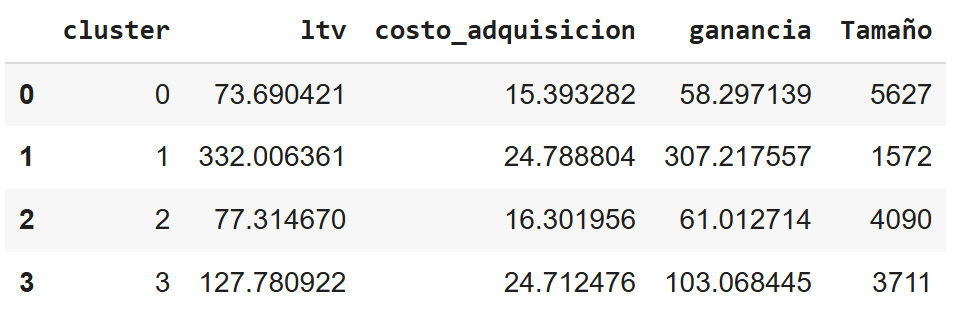

*Plan de Inversión (US$10,000):*

Este plan se repartirá así:

Cluster 1: Clientes leales de alto valor (alto LTV, alta ganancia). Daria el presupuesto de 4,000 USD, pues este grupo ya representa una parte significativa de la rentabilidad del negocio. Sería para invertir en retenerlos y premiarlos con incentivos exclusivos, fortaleciendo su lealtad y aumentando las compras repetidas. Para eso se harian estrategia de fidelización con contenido exclusivo, promociones personalizadas, programas VIP, etc.

Cluster 0: Clientes potenciales (potencial de crecimiento). Daría el presupuesto de 6,000 USD, ya que este grupo tiene un gran potencial de crecimiento y si se les ofrece el estímulo adecuado sería ganancia; la estrategia sería con campañas de conversión o aumento del ticket promedio, promociones dirigidas, pruebas A/B, entre otras.

El enfoque en Cluster 1 y Cluster 0 maximiza el retorno de la inversión. Cluster 1 es clave para la rentabilidad del negocio debido a su alto valor de compra, mientras que Cluster 0 ofrece el mayor potencial de crecimiento.

*Mejoras al Dataset y Metodología:*

Yo ampliaría el periodo de análisis, pues permitiría una segmentación más precisa, así como identificaría patrones periódicos y estacionales, lo que mejoraría la predicción de comportamientos futuros. Tambien, incorporaría datos como tipo de producto comprado, nivel de interacción en la web y características demográficas detalladas, es decir, ubicación, etc., esto ofrecería una visión más completa y precisa del comportamiento del cliente, entre otras mejoras que agregaria.

In [233]:
cluster_sizes = df.groupby('cluster')['id_cliente'].count().reset_index() #Tabla LTV, CAC, Ganancia, tamaño
cluster_sizes.rename(columns={'id_cliente': 'Tamaño'}, inplace=True)

cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='cluster')

summary_table = cluster_summary[['cluster', 'ltv', 'costo_adquisicion', 'ganancia', 'Tamaño']]
summary_table

,cluster,ltv,costo_adquisicion,ganancia,Tamaño
0,0,73.690421,15.393282,58.297139,5627
1,1,332.006361,24.788804,307.217557,1572
2,2,77.314670,16.301956,61.012714,4090
3,3,127.780922,24.712476,103.068445,3711
